**Importing Necessary Libraries and getting the data.**

In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data = r'C:\Users\Windows 10 Pro\Desktop\diabetes.csv'
df = pd.read_csv(Data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Examining the Data**

In [7]:
# To see Data types and look for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# To do descriptive analysis
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Doing Visualizations to see distribution of data**

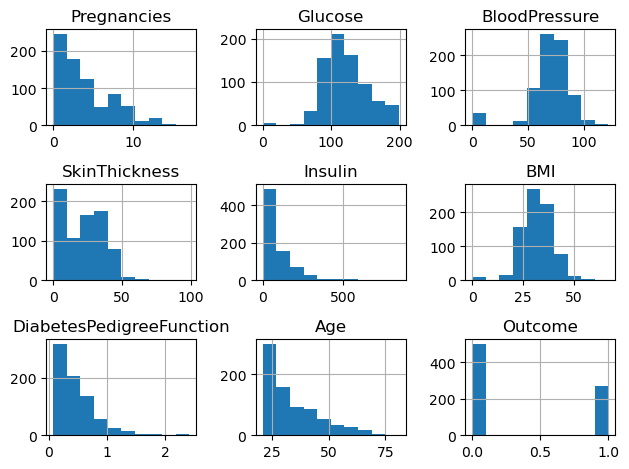

In [13]:
# Doing Histogram
plot = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
plot.hist()
plt.tight_layout()
plt.show()

**Lets do a correlation Matrix**

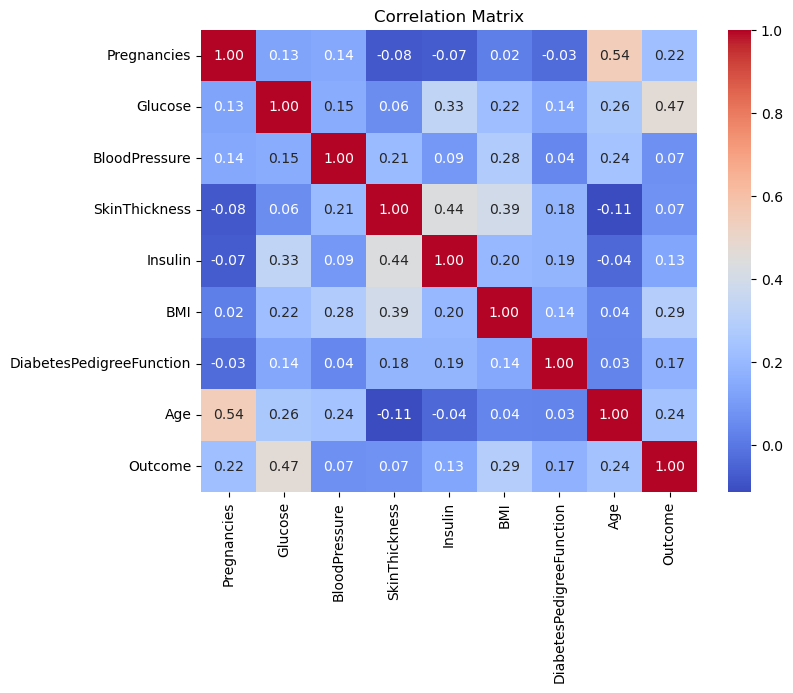

In [19]:
correlation = df.corr()

plt.figure(figsize=(8, 6))  # Set the width and height of the plot
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Explanation:**

As you can see, glucose has the strongest correlation with outcome (0.47), followed by BMI(0.29), Age(0.24), and pregnancies(0.22). Insulin, diabetes pedigree function, blood pressure, and skin thickness have weaker correlations with outcome.

**TRAINING THE MODEL**

In [31]:
# Choosing the x and y variable(s).

x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df.Outcome

#Train Test and Split

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)
print("Training: ", train_x.shape, train_y.shape)
print("Testing: ", test_x.shape, test_y.shape)

Training:  (614, 8) (614,)
Testing:  (154, 8) (154,)


**Creating a regression Model**


In [32]:
from sklearn.linear_model import LogisticRegression

MODEL = LogisticRegression()

# Train or fit the model 
MODEL.fit(train_x, train_y)

C:\Users\Windows 10 Pro\anaconda3\anaconda 3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
predictions = MODEL.predict(test_x)
print("Predictions: ", predictions)

Predictions:  [1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


**Accuracy Score**

In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(predictions, test_y)
accuracy

0.8311688311688312

An accuracy of 0.83, or 83%, in a classification task indicates that your model is correctly predicting the target variable about 83%  on the test dataset. 

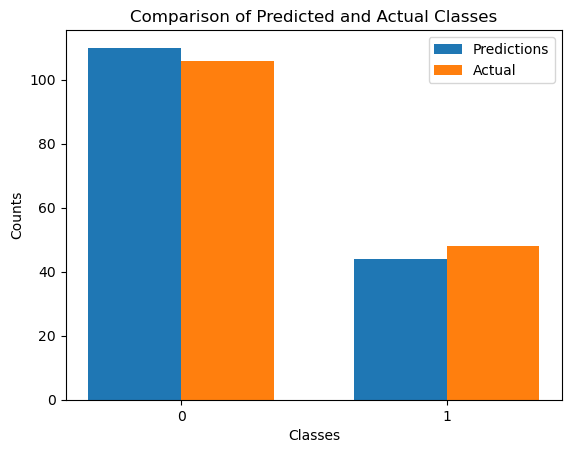

In [38]:
# Assuming test_y contains the actual values from the test set
# predictions contains the predicted values from your model

# Convert predictions and test_y to integers (if they're not already)
predictions_int = np.round(predictions).astype(int)
test_y_int = test_y.astype(int)

# Count the occurrences of each class in predictions and test_y
unique_classes, class_counts_pred = np.unique(predictions_int, return_counts=True)
unique_classes, class_counts_actual = np.unique(test_y_int, return_counts=True)

# Create bar plots for predicted and actual classes
width = 0.35
fig, ax = plt.subplots()
index = np.arange(len(unique_classes))

bar1 = ax.bar(index - width/2, class_counts_pred, width, label='Predictions')
bar2 = ax.bar(index + width/2, class_counts_actual, width, label='Actual')

ax.set_xlabel('Classes')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Predicted and Actual Classes')
ax.set_xticks(index)
ax.set_xticklabels(unique_classes)
ax.legend()

plt.show()